# Анализ рекламы Procrastinate Pro+

**Задача — разобраться в причинах и помочь компании выйти в плюс.**

Необходимо изучить:

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

Данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [18]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
from os import listdir
import os

In [19]:
visits = pd.read_csv('datasets/visits_info_short.csv')
orders = pd.read_csv('datasets/orders_info_short.csv')
costs = pd.read_csv('datasets/costs_info_short.csv')

Преобразуем типы данных для вышеперечисленных датафреймов, а также переименуем колонки.

In [20]:
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])

visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [21]:
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [22]:
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])

orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [23]:
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [24]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

costs.columns = [x.lower().replace(' ', '_') for x in costs.columns]

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [25]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [26]:
def print_basic(df):
    print(df.info())
    print(df.head())
    
tmp_list = [visits, orders, costs]
for i in tmp_list:
    print_basic(i)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None
        user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac

In [27]:
print('Missing values in visits:', visits.isnull().values.any())
print('Missing values in orders:', orders.isnull().values.any())
print('Missing values in costs:', costs.isnull().values.any())

Missing values in visits: False
Missing values in orders: False
Missing values in costs: False


Пропущенные значения отсутствуют.

In [28]:
print('Duplicates in visits:', visits.duplicated().values.any())
print('Duplicates in orders:', orders.duplicated().values.any())
print('Duplicates in costs:', costs.duplicated().values.any())

Duplicates in visits: False
Duplicates in orders: False
Duplicates in costs: False


Дубликаты отсутствуют.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Создание профилей пользователей

In [29]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Подсчёт Retention Rate

In [30]:
# функция для расчёта удержания
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Подсчёт конверсии

In [31]:
# функция для расчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Подсчёт LTV

In [32]:
# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Сглаживание данных

In [33]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### Построение графика Retention Rate

In [34]:
# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### Построение графика конверсии

In [35]:
# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 


#### Визуализация LTV и ROI

In [36]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [37]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769


In [38]:
print('Минимальная дата привлечения пользователей:', profiles['dt'].min())
print('Максимальная дата привлечения пользователей:', profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


In [39]:
tmp_paid = profiles.query('payer == True')

def fraction_for_each(a):
    f_payer = (
        profiles.groupby(a)
        .agg(
            {
                'user_id': 'nunique',
                'payer': 'mean'
            }
        )
        .rename(columns={'payer': 'fraction_paid', 'user_id': 'total'})
        .reset_index()
    )
    
    f_payer['fraction_paid'] = f_payer['fraction_paid'].round(3)
    
    return f_payer
  
tmp_list = ['region', 'device', 'channel']

for i in tmp_list:
    tmp = fraction_for_each(i)
    print(tmp.sort_values(by='total', ascending=False))
    print()

          region   total  fraction_paid
3  United States  100002          0.069
2             UK   17575          0.040
0         France   17450          0.038
1        Germany   14981          0.041

    device  total  fraction_paid
3   iPhone  54479          0.062
0  Android  35032          0.059
2       PC  30455          0.050
1      Mac  30042          0.064

               channel  total  fraction_paid
10             organic  56439          0.021
1             FaceBoom  29144          0.122
6               TipTop  19561          0.096
4   OppleCreativeMedia   8605          0.027
2              LeapBob   8553          0.031
7       WahooNetBanner   8553          0.053
5       RocketSuperAds   4448          0.079
3         MediaTornado   4364          0.036
8              YRabbit   4312          0.038
0           AdNonSense   3880          0.113
9       lambdaMediaAds   2149          0.105



- Только по США 100002 пользователей, где доля платящих составляет 7%. Следующей в списке идет Германия (~4%). И хотя пользователей из Германии меньше, чем из Франции и Великобритании, доля платящих пользователей там выше.


- Среди клиентов преобладают пользователи iPhone (54479). Однако, несмотря на то что пользователей Mac меньше всего, доля платящих клиентов среди них выше (~6.3%).


- Большинство пользователей являются «органическими» (56439). Больше всего платящих пользователей пришло из FaceBoom (доля платящих составляет 12%). Но хотя пользователей, привлеченных из AdNonSense (3880) и lambdaMediaAds (2149), намного меньше, чем из FaceBoom, доля платящих пользователей для каждого канала среди них примерно одинаковая (11% и 10%).

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [40]:
total_marketing = costs['costs'].sum()
print('Общая сумма расходов на маркетинг:', total_marketing)

Общая сумма расходов на маркетинг: 105497.30000000002


In [41]:
channel_price = costs.groupby('channel').agg({'costs': 'sum'}).reset_index()
channel_price.sort_values(by='costs', ascending=False)

,channel,costs
6,TipTop,54751.30
1,FaceBoom,32445.60
7,WahooNetBanner,5151.00
0,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
2,LeapBob,1797.60
9,lambdaMediaAds,1557.60
3,MediaTornado,954.48
8,YRabbit,944.22


Больше всего денег потратили на TipTop и FaceBoom, а меньше всего на MediaTornado и YRabbit.

Text(0.5, 1.0, 'Динамика изменения расходов во времени по месяцам по каждому источнику')

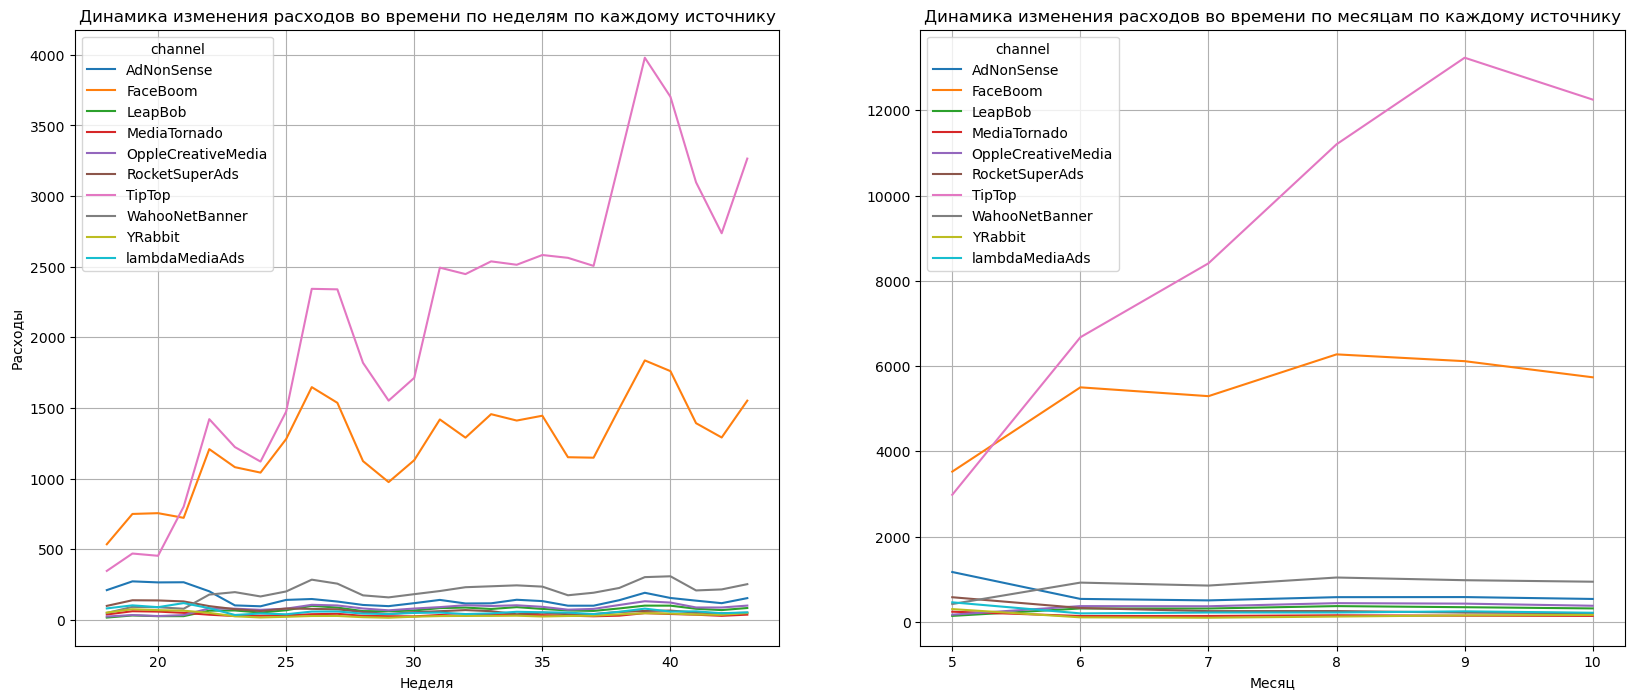

In [42]:
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(1, 2, 1)
columns = costs['channel'].unique()
costs['week'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['week'].dt.isocalendar().week
tmp = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
tmp.plot(grid=True, ax=ax1)
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.title('Динамика изменения расходов во времени по неделям по каждому источнику')

ax2 = plt.subplot(1, 2, 2)
costs['month'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['month'].dt.month
tmp2 = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
tmp2.plot(grid=True, ax=ax2)
plt.xlabel('Месяц')
plt.title('Динамика изменения расходов во времени по месяцам по каждому источнику')

Из следующих графиков можно сделать вывод, что расходы на TipTop и FaceBoom увеличивались до 9 месяца и 8 месяца соответственно, а затем траты на оба канала пошли на спад. Расходы на остальные каналы оставались примерно на одном и том же уровне. Также до 6 месяца можно заметить уменьшение трат на AdNonSense, в то время как расходы на WahooNetBanner росли.

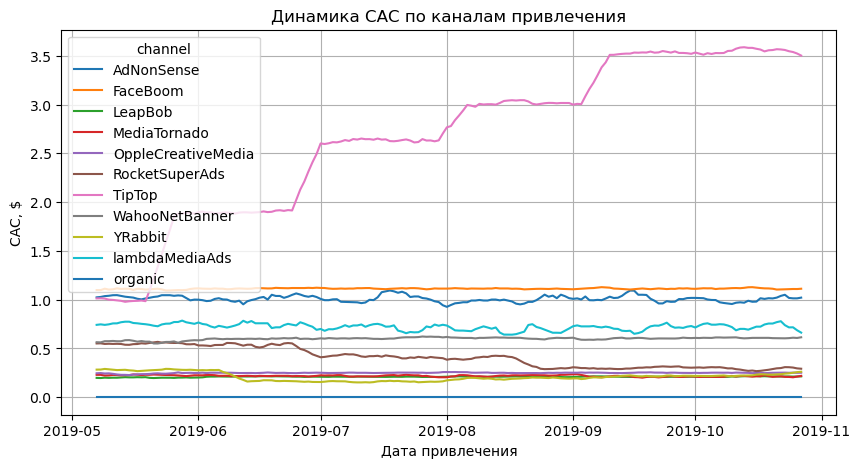

In [43]:
report = profiles.pivot_table(index='dt', columns='channel', values='acquisition_cost', aggfunc='mean')

filter_data(report, 7).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Средняя стоимость привлечения одного пользователя из TipTop постоянно увеличивалась. Также стоимость привлечения для RocketSuperAds уменьшалась до конца августа. Привлечение одного пользователя из FaceBoom обошлось в среднем чуть больше 1 доллара, а из AdNonSense — примерно в $1. Для остальных каналов CAC стабилен на протяжении всего времени.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Общий тренд

Т.к. максимальная дата привлечения пользователей 27 октября 2019 года, стоит взять эту дату как момент анализа.

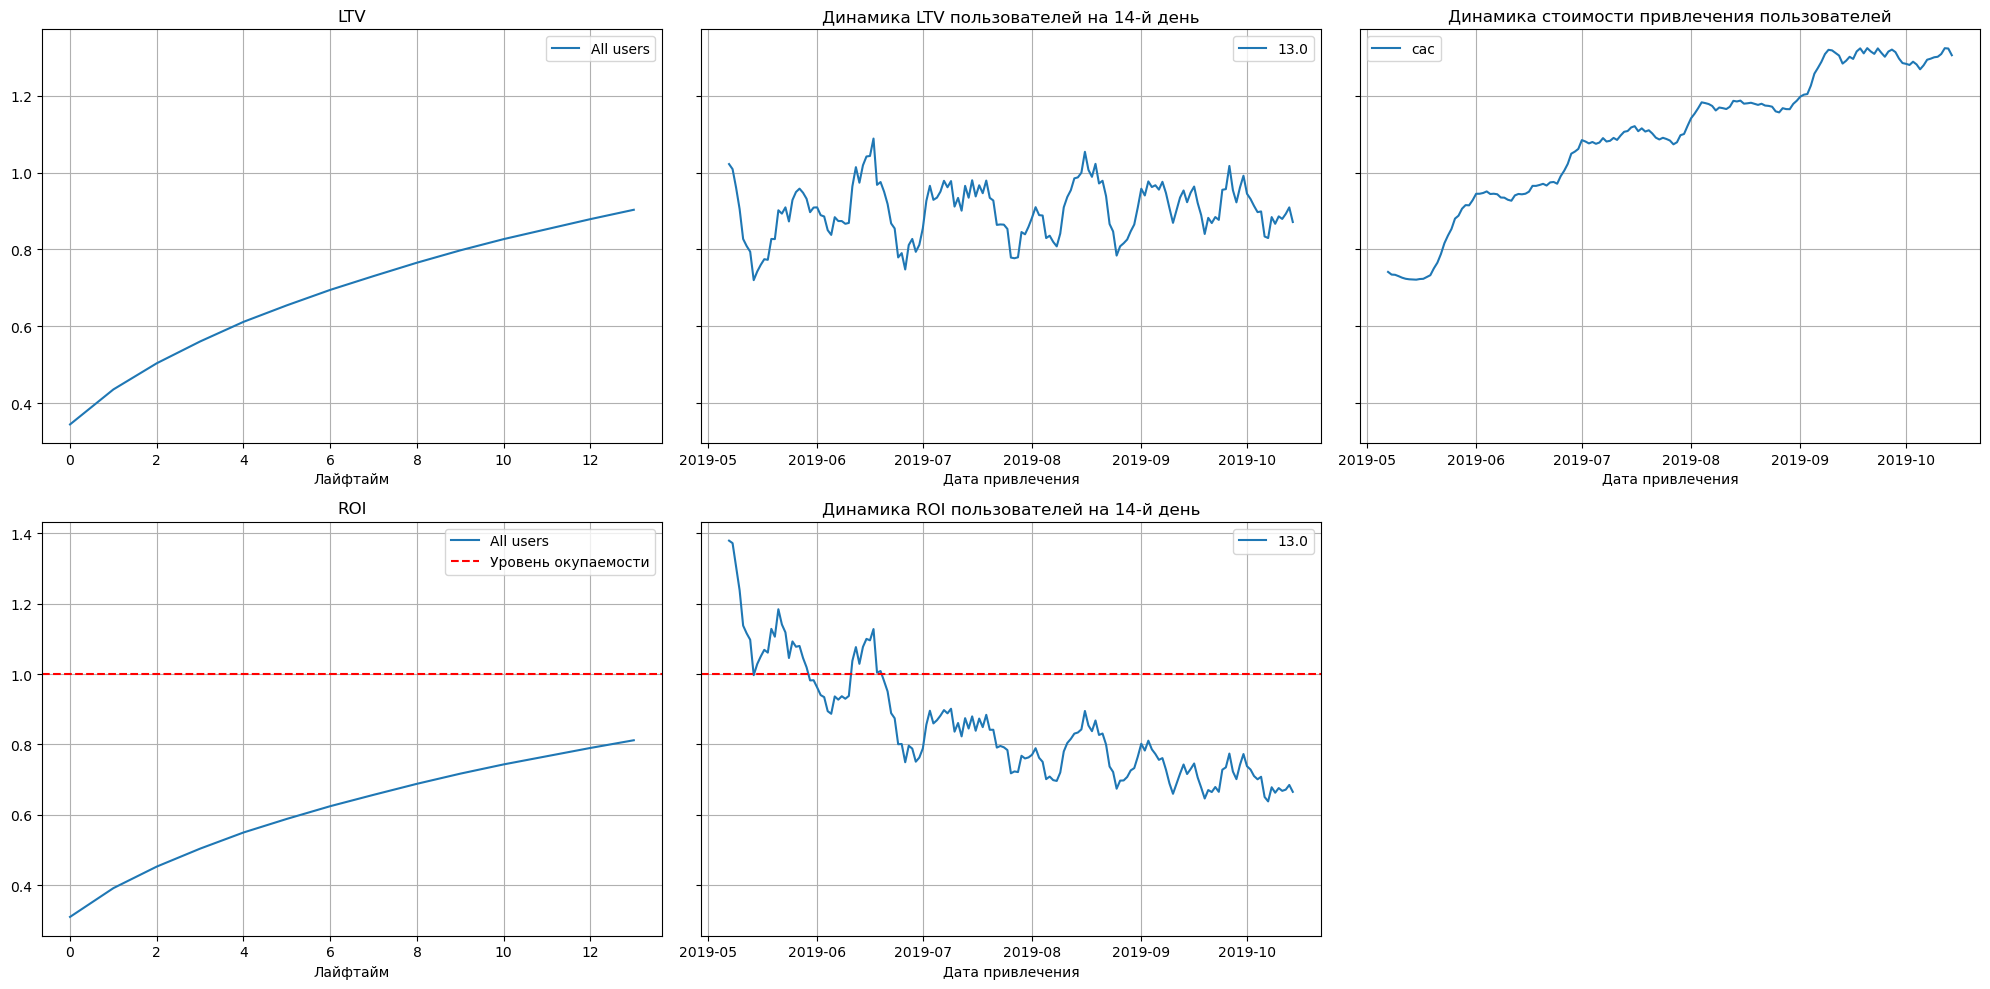

In [44]:
observation_date = datetime(2019, 10, 27).date()
analysis_horizon = 14

# remove organic clients
profiles_no_organic = profiles.query('channel != \'organic\'')

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_no_organic, orders, observation_date, analysis_horizon
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=7)

- Кривая LTV плавно растёт.

- LTV подвержен сезонности.

- Стоимость привлечения растет.

- Реклама не окупается.

- Реклама окупалась до конца мая и в середине июня.

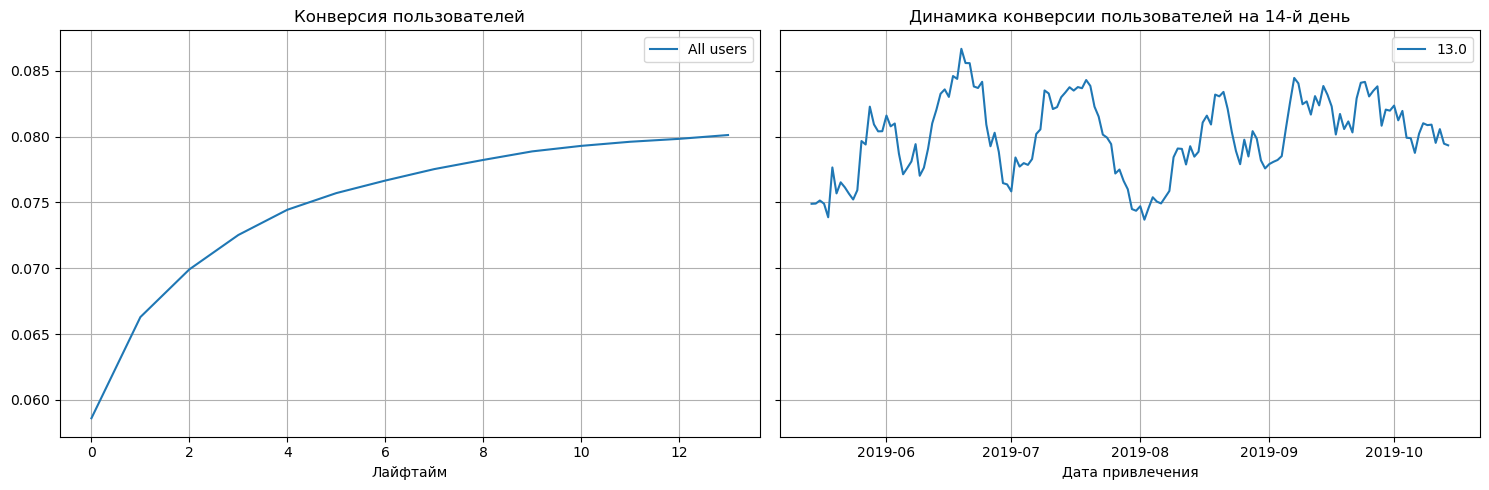

In [45]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_no_organic, orders, observation_date, analysis_horizon
)

plot_conversion(conversion, conversion_history, analysis_horizon, window=14)

- Кривая конверсии растёт.

- Пользователи конвертируются более-менее хорошо.

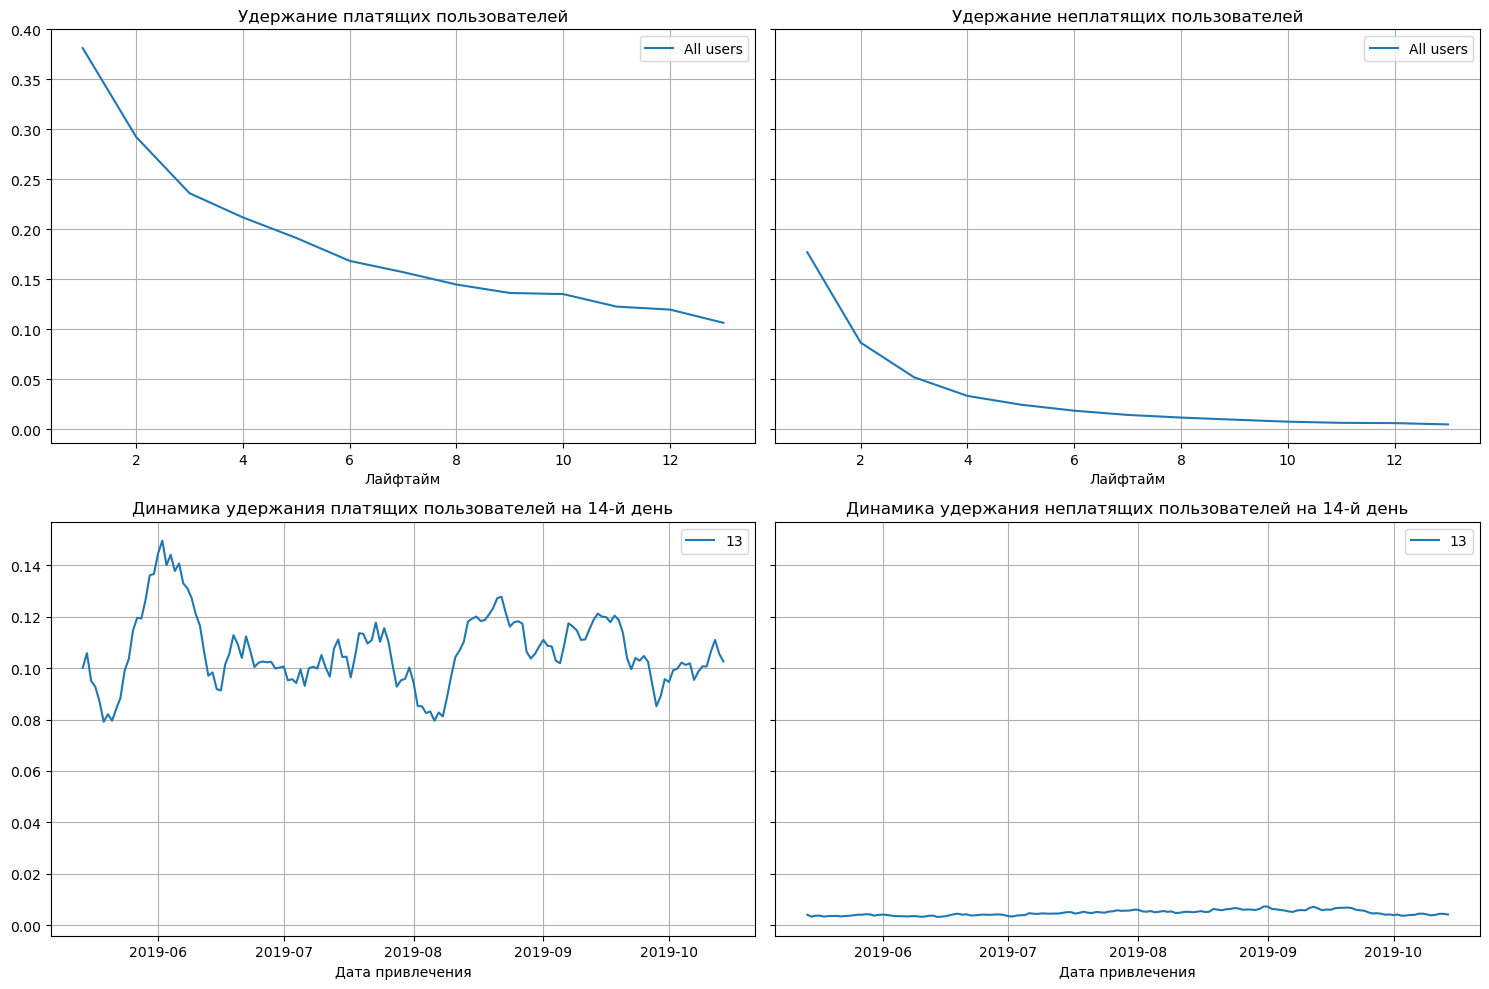

In [46]:
retention_raw, retention, retention_history = get_retention(
    profiles_no_organic,visits,observation_date,analysis_horizon
)

plot_retention(retention, retention_history, analysis_horizon, window=14)

- Платящие пользователи удерживаются лучше, чем неплатящие.

#### По устройствам

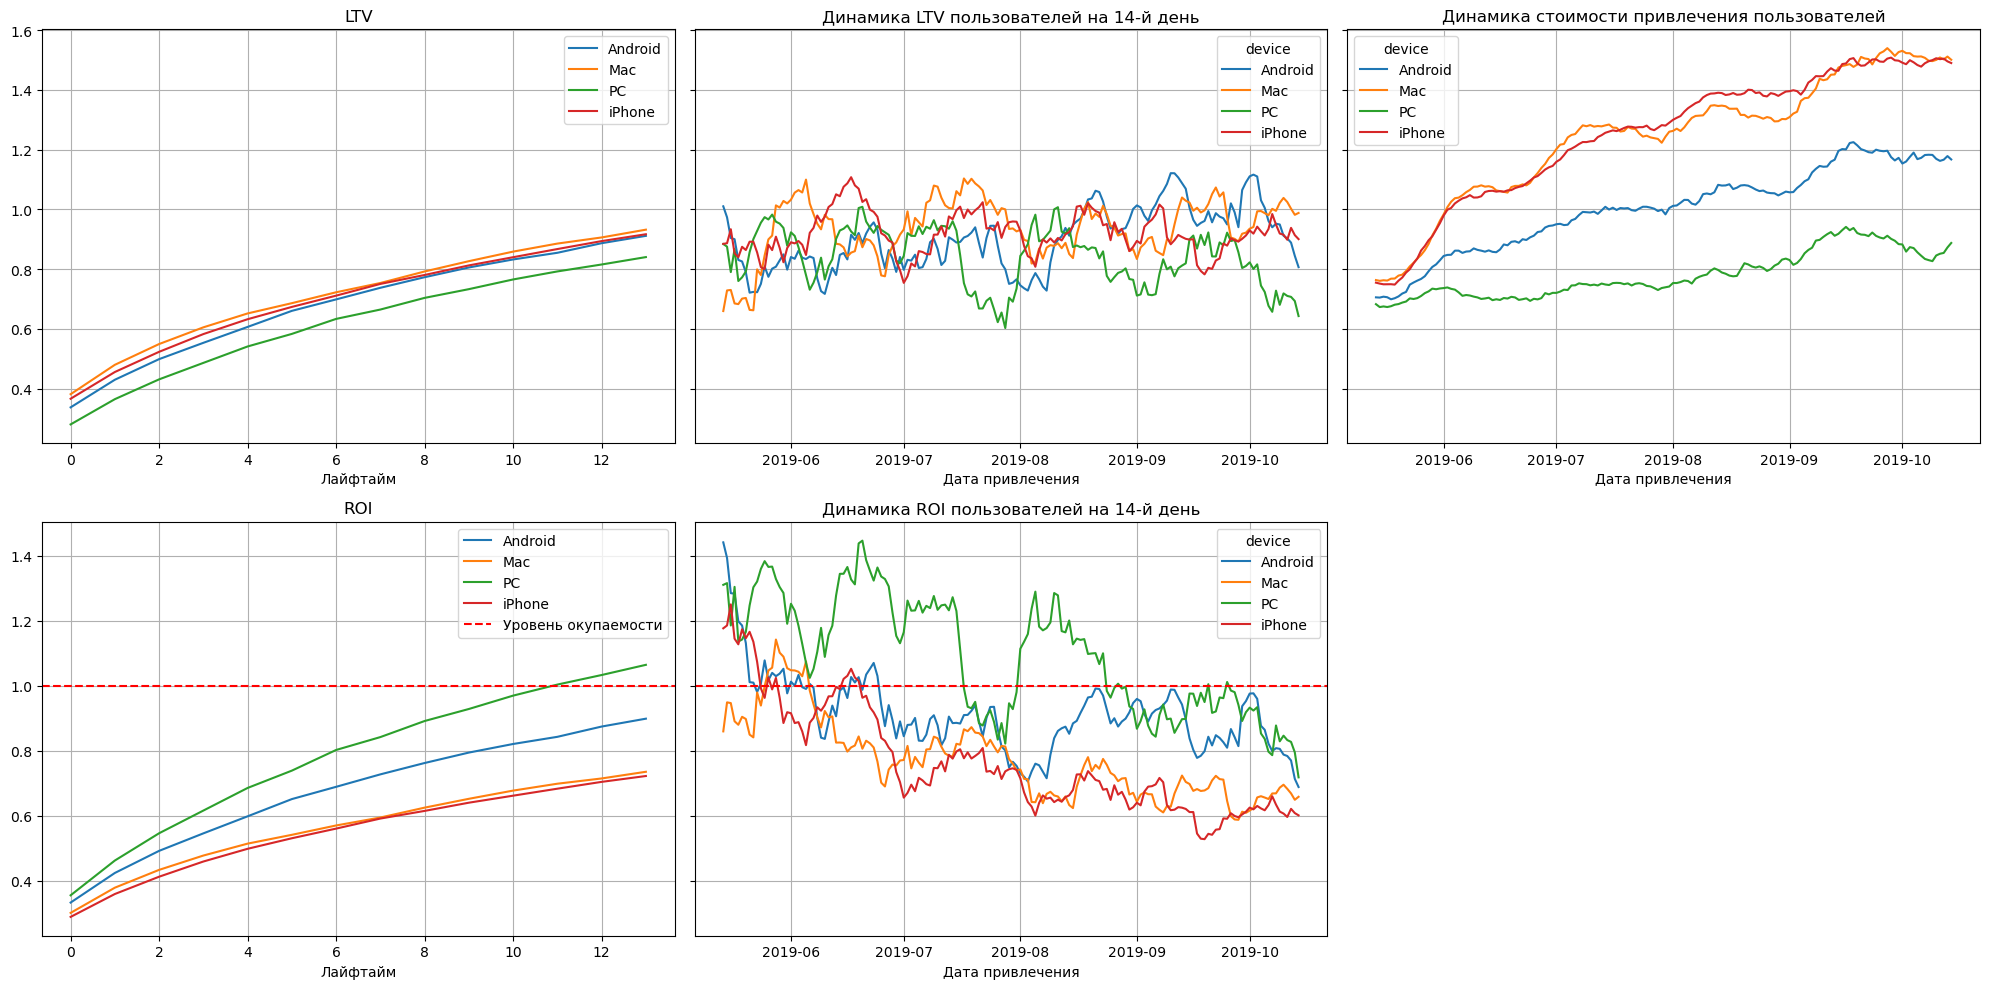

In [47]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_no_organic, orders, observation_date, analysis_horizon, dimensions=['device']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=14)

- Самый низкий LTV — у пользователей PC.

- Стоимость привлечения пользователей PC ниже, чем других устройств.

- В то же время реклама окупилась только для пользователей PC.

- График динамики ROI показывает, что с конца августа реклама не окупается вовсе для всех устройств.

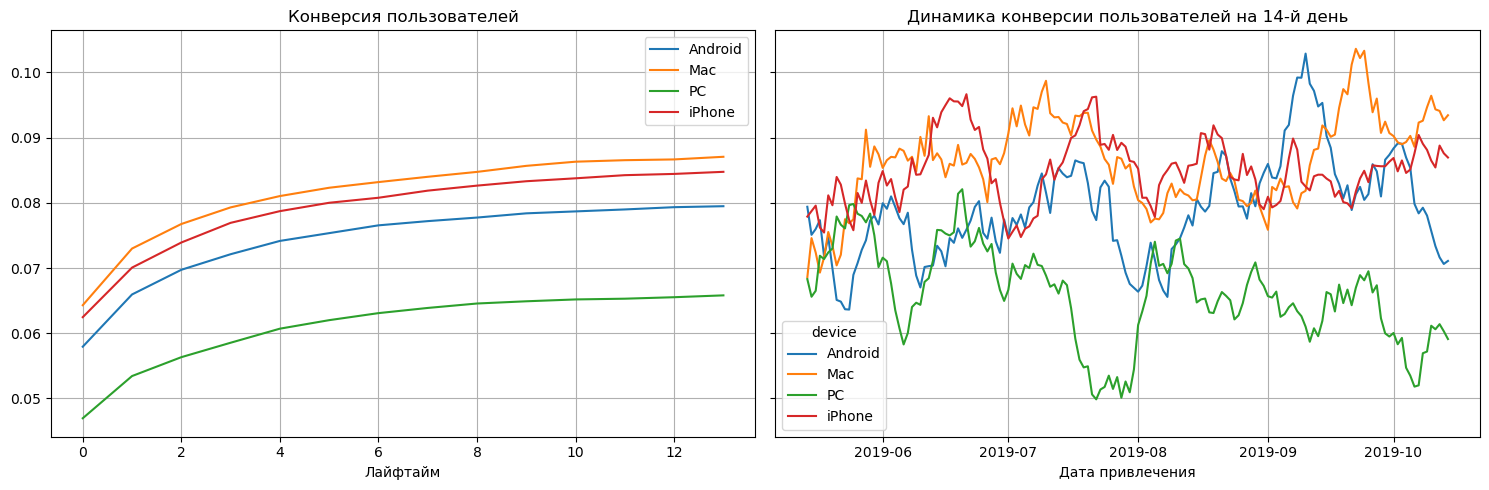

In [48]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_no_organic, orders, observation_date, analysis_horizon, dimensions=['device']
)

plot_conversion(conversion, conversion_history, analysis_horizon, window=14)

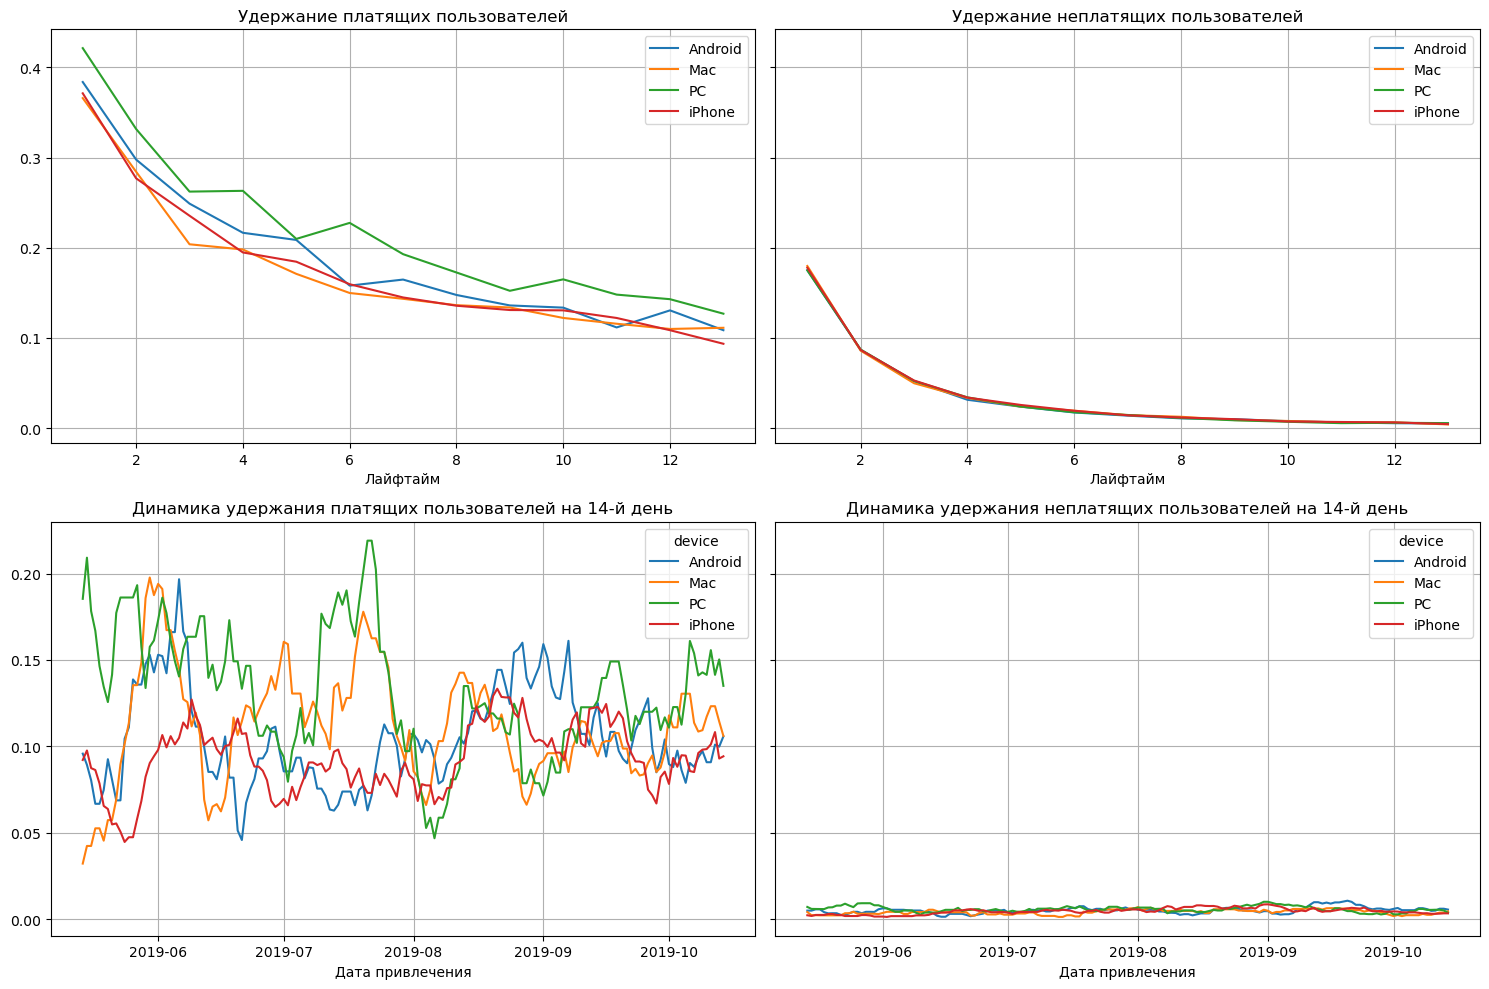

In [49]:
retention_raw, retention, retention_history = get_retention(
    profiles_no_organic,visits,observation_date,analysis_horizon, dimensions=['device']
)

plot_retention(retention, retention_history, analysis_horizon, window=14)

Пользователи PC конвертируются не так хорошо, как пользователи других устройств. Но удерживаются они лучше.

#### По регионам

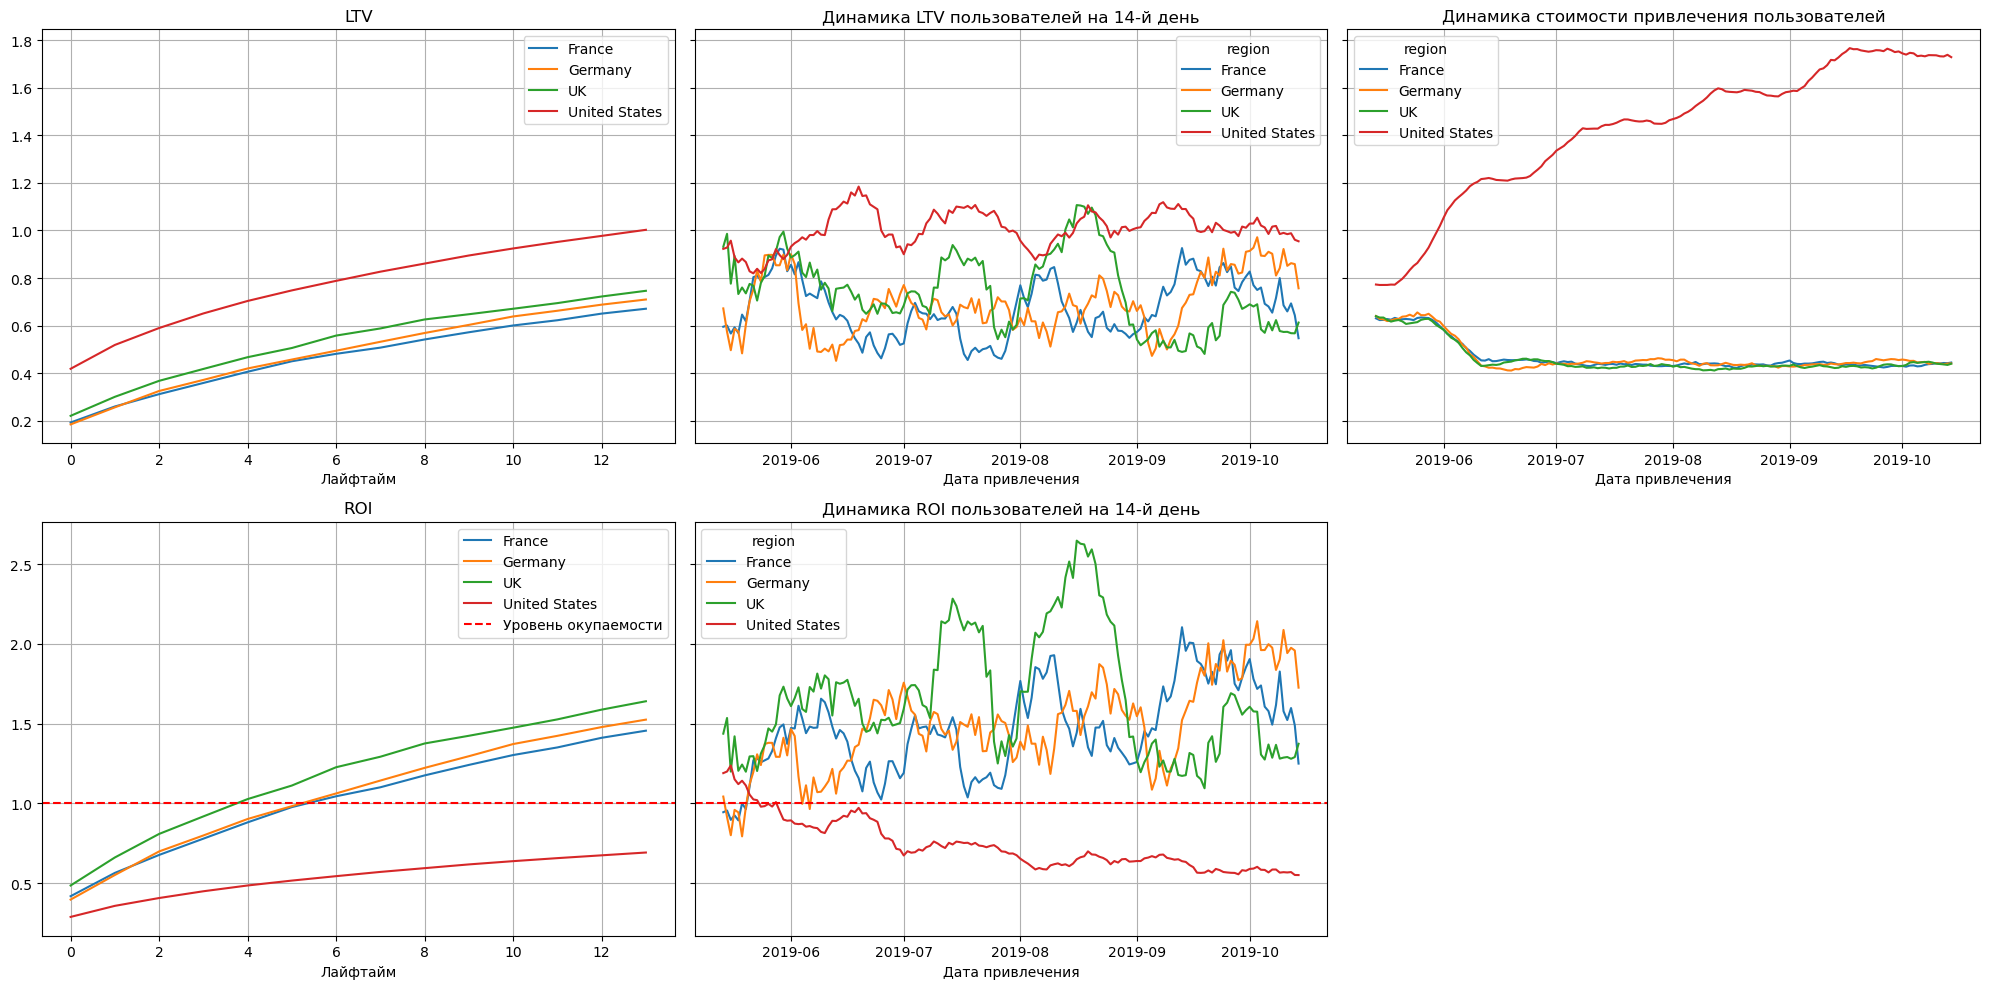

In [50]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_no_organic, orders, observation_date, analysis_horizon, dimensions=['region']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=14)

- Самый высокий LTV — у жителей США.

- Стоимость привлечения пользователей из США увеличивается, в то время как для пользователей из других стран CAC показывал негативный рост в период с конца мая до середины июня.

- Реклама окупилась везде, кроме США. 

- Жители Великобритании временами показывают очень хорошую окупаемость (на 170-275%). Окупаемость среди клиентов из Америки стабильно падает. В самом конце рекламе в этом регионе не хватило до окупаемости примерно 50%. 

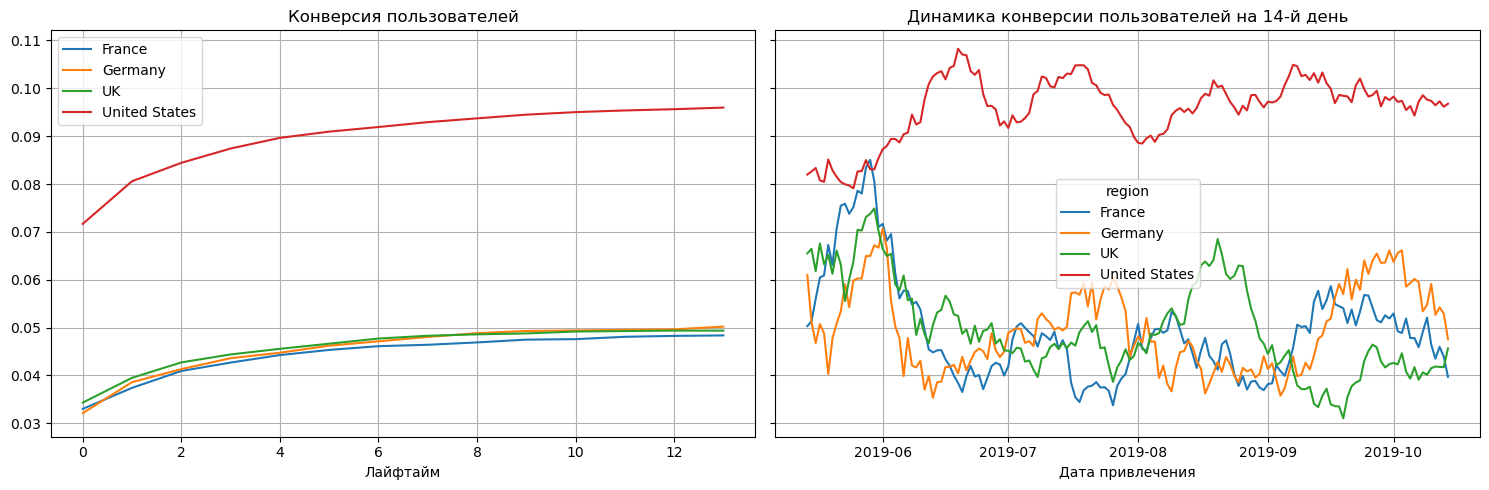

In [51]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_no_organic, orders, observation_date, analysis_horizon, dimensions=['region']
)

plot_conversion(conversion, conversion_history, analysis_horizon, window=14)

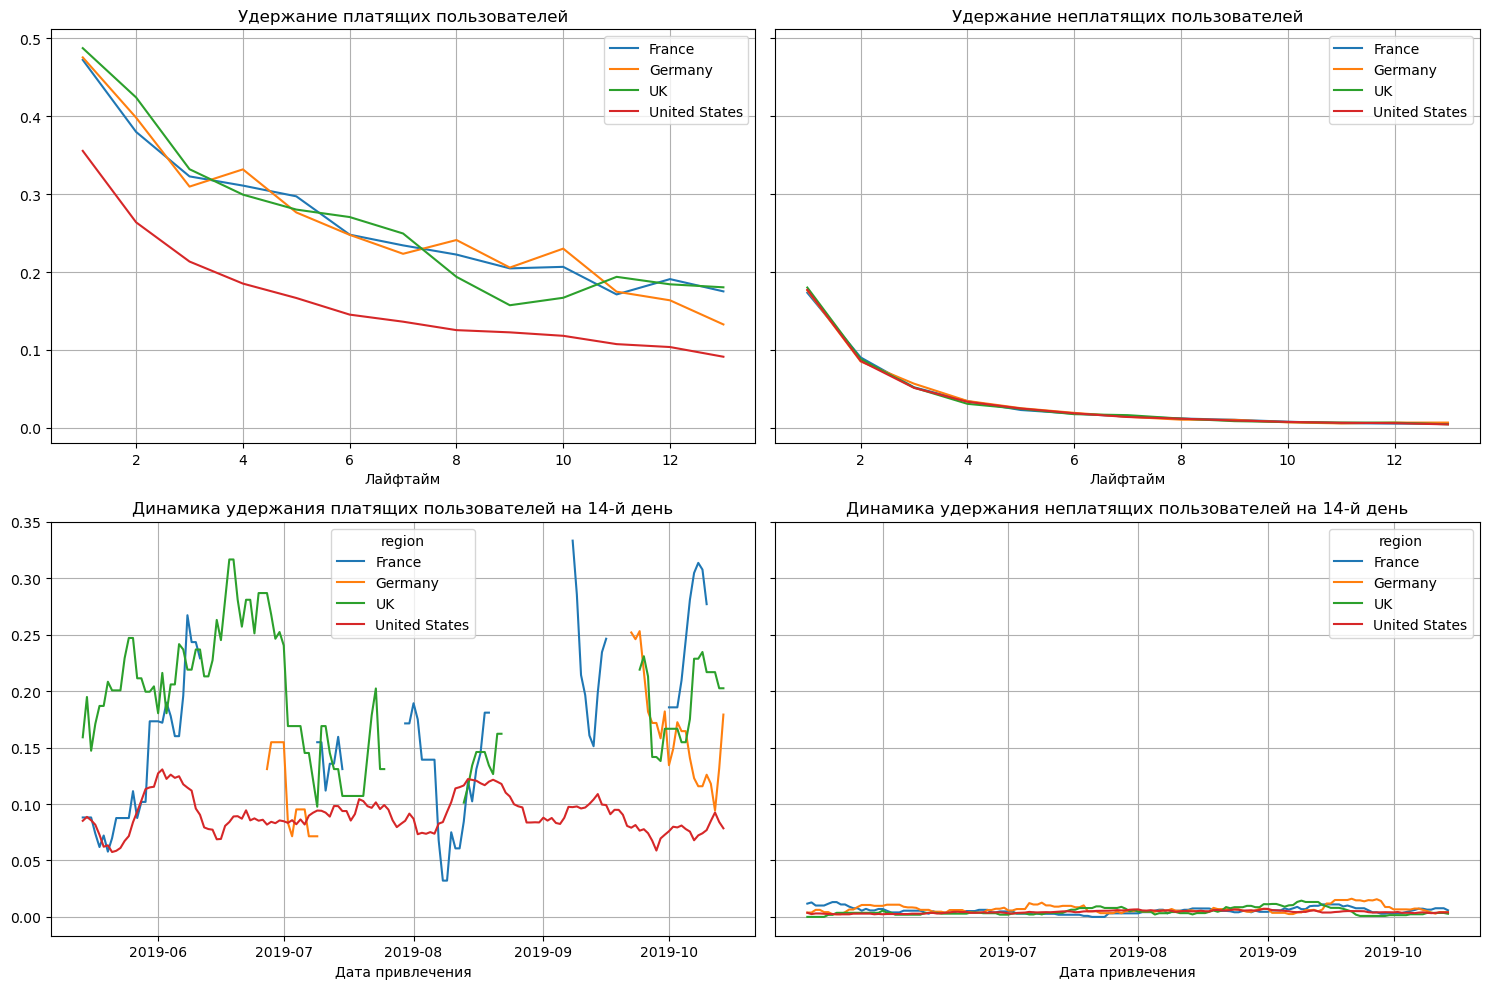

In [52]:
retention_raw, retention, retention_history = get_retention(
    profiles_no_organic,visits,observation_date,analysis_horizon, dimensions=['region']
)

plot_retention(retention, retention_history, analysis_horizon, window=14)

Пользователи из США конвертируются лучше других. Но удерживаются они хуже.

#### По каналам

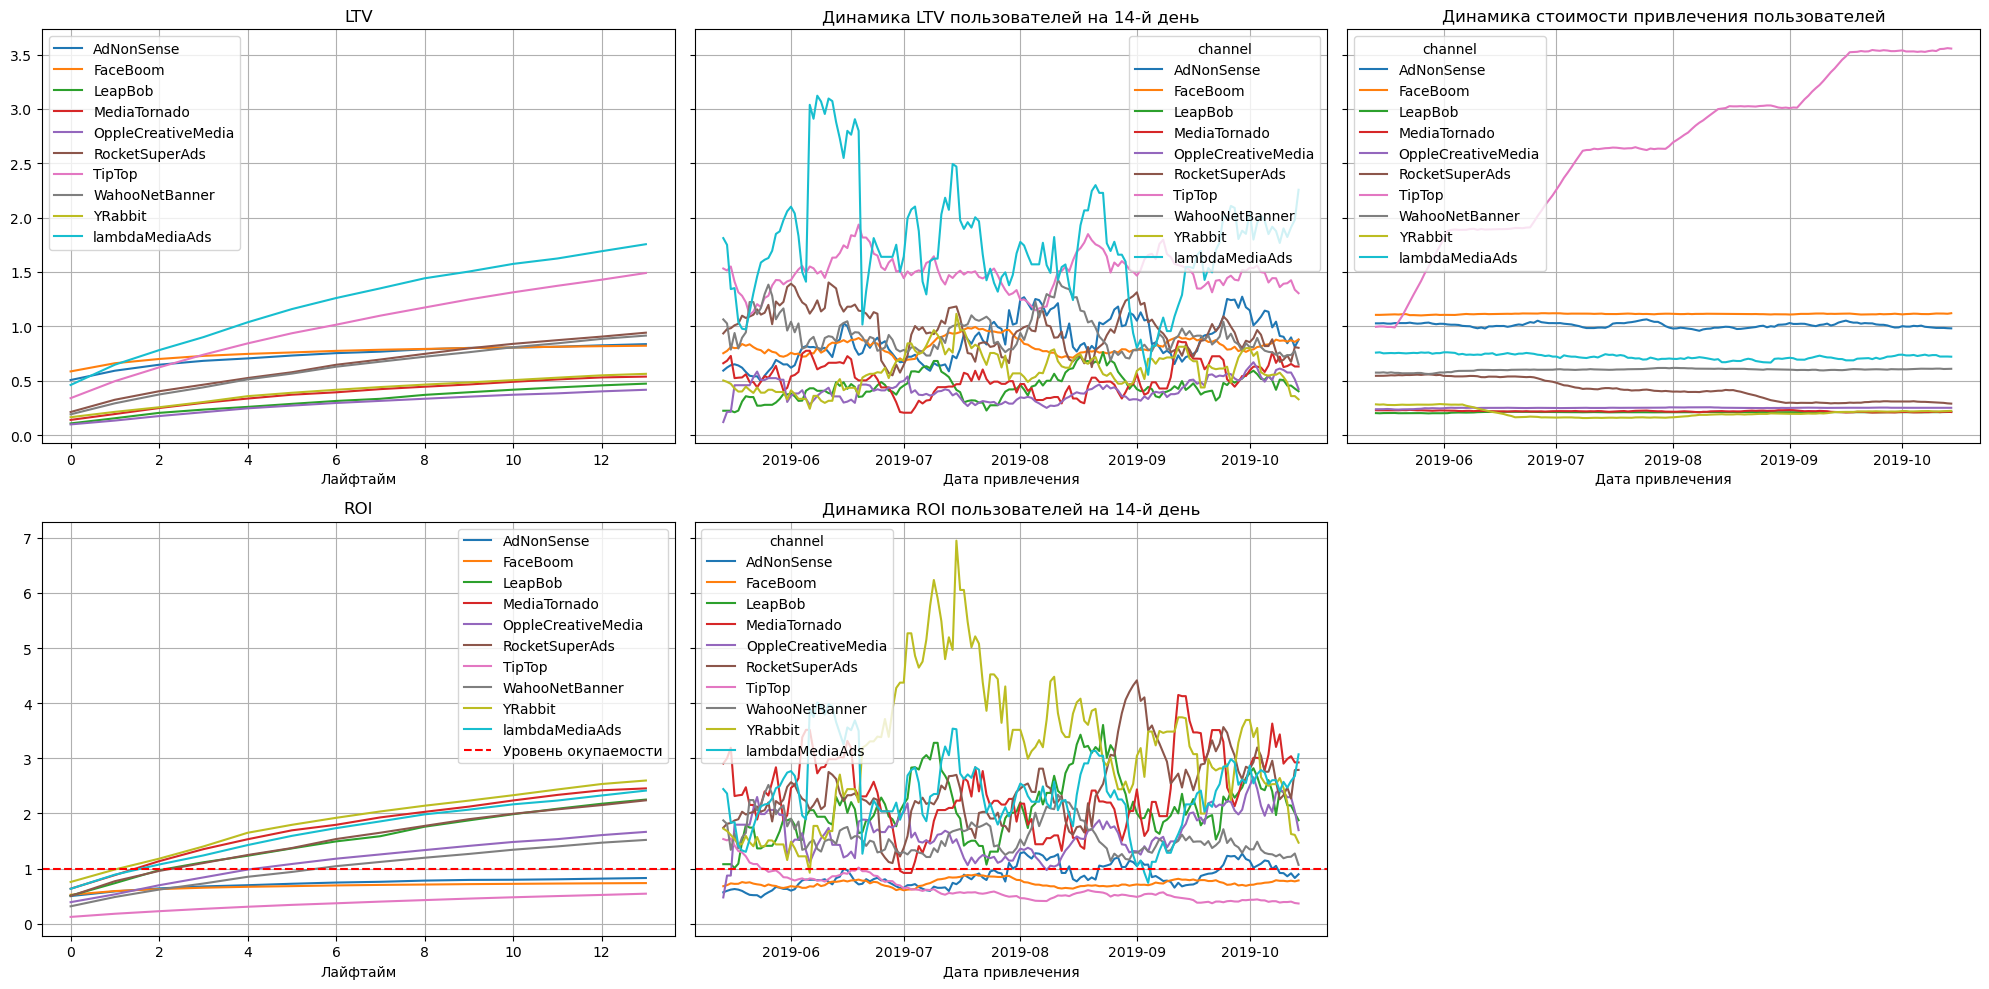

In [53]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_no_organic, orders, observation_date, analysis_horizon, dimensions=['channel']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=14)

- Стоимость привлечения пользователей для канала TipTop постоянно растет.

- LTV среди пользователей, пришедших из TipTop и lambdaMediaAds, лучше, чем у остальных.

- Реклама из TipTop, AdNonSense и FaceBoom не окупилась. Наилучшая окупаемость у канала YRabbit (ROI выше 250%).

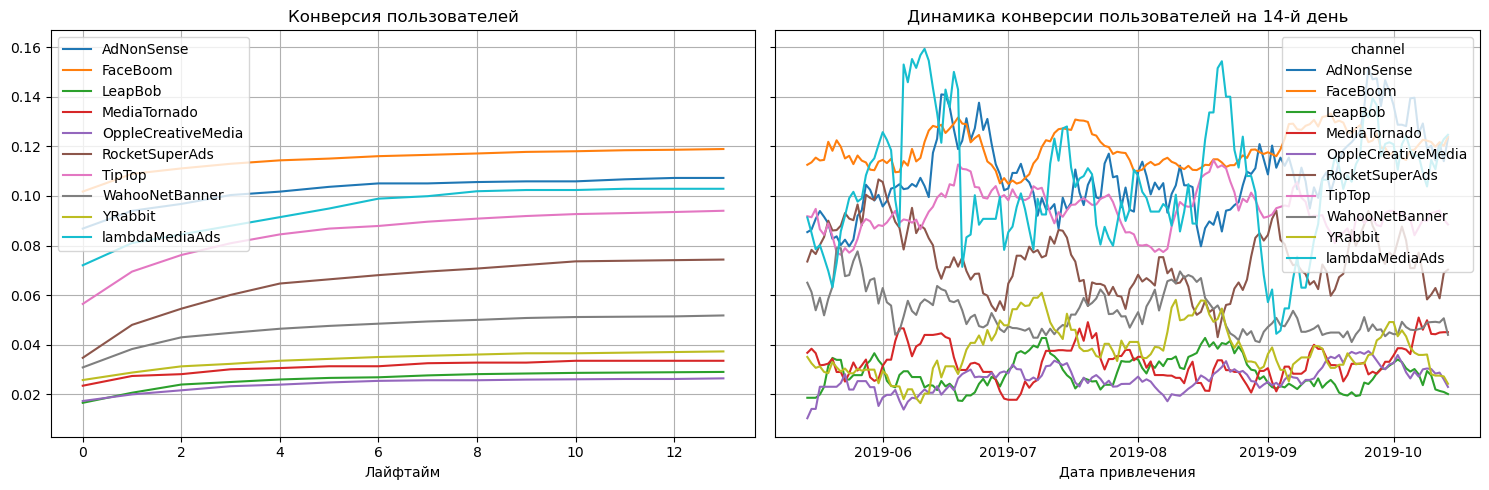

In [54]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_no_organic, orders, observation_date, analysis_horizon, dimensions=['channel']
)

plot_conversion(conversion, conversion_history, analysis_horizon, window=14)

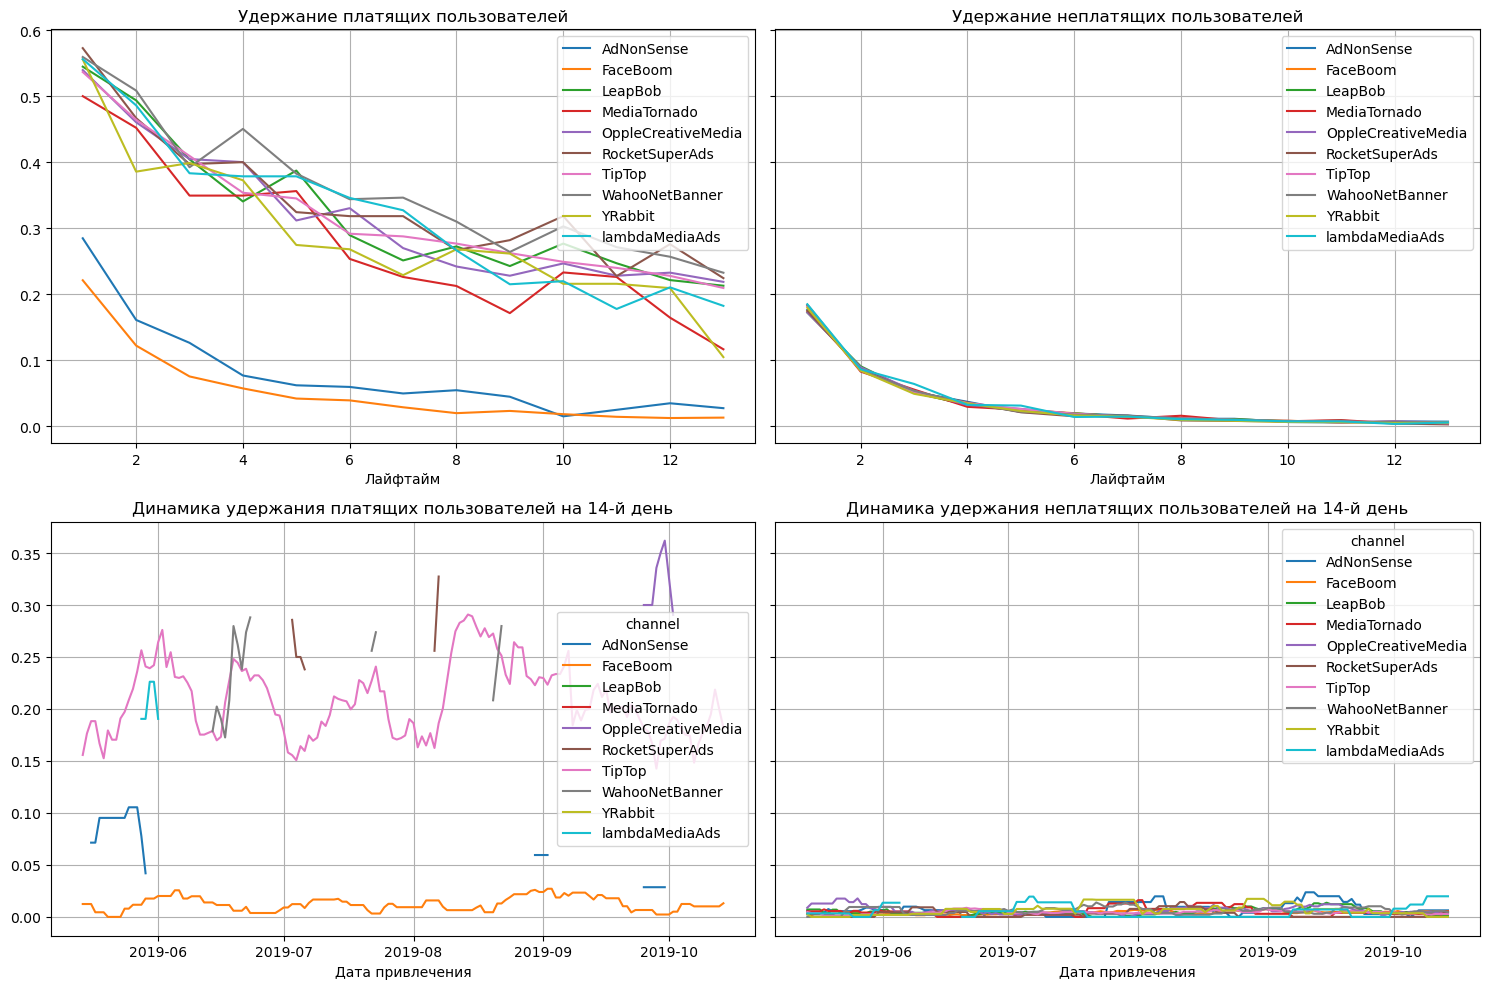

In [55]:
retention_raw, retention, retention_history = get_retention(
    profiles_no_organic,visits,observation_date,analysis_horizon, dimensions=['channel']
)

plot_retention(retention, retention_history, analysis_horizon, window=14)

Конверсия клиентов, которые перешли из AdNonSense и FaceBoom, выше, чем у других каналов. Но удерживаются они хуже. 

#### Ответы на вопросы:

 - В целом реклама не окупается.
 
 
 - Такие устройства, как Mac, Android и iPhone могут оказывать негативное влияние на окупаемость рекламы, т.к. стоимость привлечения пользователей для данных устройсв высока, но результат минимальный. То же самое можно сказать о клиентах из США, а также про пользователей, пришедших из канала TipTop, FaceBoom и AdNonSense.
 
 
 - Проблемы неокупаемости могут быть вызваны слишком большими тратами на рекламу в США. Можно заметить сходство роста стоимости привлечения US и TipTop. Таким образом, можно сделать вывод, что большинство клиентов из США были привлечены через этот канал. Несмотря на большое количество покупателей в данном регионе, клиенты не покупают достаточно, чтобы покрыть траты на их привлечение.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

#### **Причины неэффективности привлечения пользователей:**

Как было сказано ранее, возможной причиной неэффективности рекламной компании стали слишком большие траты на рекламу в TipTop. Можно заметить, что с увеличением трат на привлечение пользователей из США, их окупаемость стала падать.


#### **Рекомендации для отдела маркетинга:**

Канал TipTop убыточный, что довольно печально, учитывая тот факт, что больше половины средств уходит на рекламу в данном источнике. Стоит отказаться от рекламы в TipTop, AdNonSense и FaceBoom (т.к. они не окупаются) и обратить внимание на менее дорогостоящие варианты, такие источники, как YRabbit, MediaTornado, lambdaMediaAds, RocketSuperAds. 